# Fisher's *F* Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [3]:
def get_continuous_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(int(np.floor(xmin)), int(np.ceil(xmax)) + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [4]:
def plot_continuous_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pdf = f.pdf(x_axis, **kwargs)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(x_axis, pdf, alpha = 0.7, color = "k")
    ax.fill_between(x_axis, pdf, alpha = 0.4)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    
    plt.xticks(get_continuous_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_continuous_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_continuous_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

La *f-distribution* fa parte delle *sampling distributions*, cioè delle distribuzioni teoriche che sono state costruite come supporto ai processi inferenziali.

La **F Distribution** è una distribuzione *right skewed* ed è sempre positiva. E' utilizzata nell'*ANOVA* per calcolare la *f statistic*, definita come il rapporto fra la variabilità media *fra* gruppi (*between groups variability*) e la variabilità *all'interno* dei gruppi (*within groups variability*).

Più in generale, l'*f-distribution* è utilizzata quando si lavora con rapporti fra varianze.

Al contrario della *t distribution*, nella *f-distribution* abbiamo due parametri di *degrees of freedom*, uno legato al *group* e uno al *non-group*.

Siano $X$ ed $Y$ due variabili aleatorie con andamento $\chi^2$ con diversi *df*, rispettivamente $m$ ed $n$.

$$\large X\sim \chi^2_m$$

$$\large Y\sim \chi^2_n$$

Il seguente rapporto fra le due variabili segue l'andamento della distribuzione di Fisher con $(m,n)$ *degrees of freedom*.

$$\large \frac{X/m}{Y/n}\sim F_{m,n}$$

La *PDF* della distribuzione di Fischer è:

$$\large f(x)=\frac{\Gamma(\frac{n+m}{2})
\frac{n}{m}^{\frac{n}{2}}x^{\frac{n}{2}-1}}
{\Gamma(\frac{n}{2})\Gamma(\frac{m}{2})
\left(1+\frac{nx}{m}\right)^{\frac{n+m}{2}}}$$

L'**expectation** dell'*f-distribution* dipende solo dal secondo valore di *df*, a patto che quest'ultimo sia strettamente maggiore di due.

$$\large E(X)=\frac{n}{n-2}$$

La **median**, invece, è pari ad uno quando i due *df* sono identici, mentre ha valore in un intorno di uno quando i due *df* non sono identici.

---

#### Probability Density Function

Mean: 1.25
Median: 1.0000000000000004
Variance: 0.9375
Standard Deviation: 0.9682458365518543


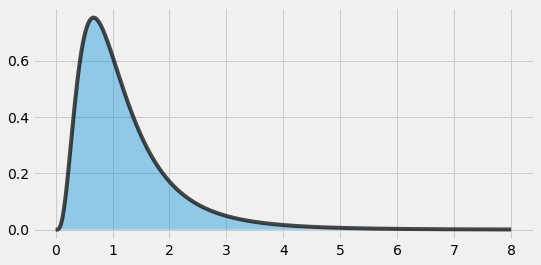

In [6]:
dfn = 10
dfd = 10

x_axis = np.linspace(0, 8, 1000)

plot_continuous_distribution(f = stats.f,
                             x_axis = x_axis,
                             dfn = dfn,
                             dfd = dfd)

Mean: 1.0204081632653061
Median: 0.8761990472073524
Variance: 0.44686241843676244
Standard Deviation: 0.6684776873140662


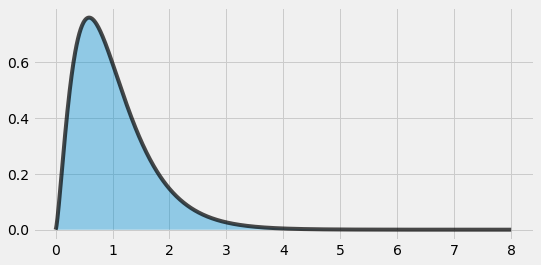

In [7]:
dfn = 5
dfd = 100

x_axis = np.linspace(0, 8, 1000)

plot_continuous_distribution(f = stats.f,
                             x_axis = x_axis,
                             dfn = dfn,
                             dfd = dfd)

---

#### RVS

Min: 0.03518244926873364
Mean: 0.9992857639542908
Median: 0.8771766071985168
Max: 3.4668441217600687
Variance: 0.3709549169176033
Standard Deviation: 0.6090606841010207


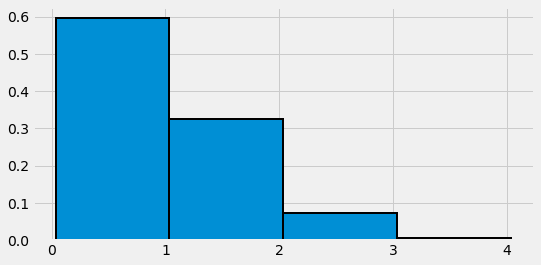

In [8]:
dfn = 5
dfd = 100

sample = sample_continuous_distribution(f = stats.f,
                                        size = 1000,
                                        dfn = dfn,
                                        dfd = dfd)

---